In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


### Scatter plot

Text(0, 0.5, 'Height')

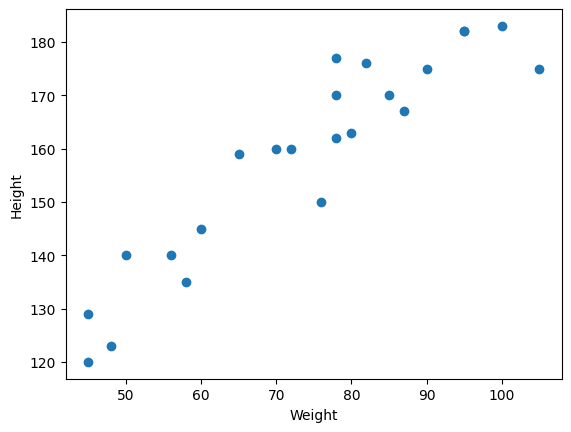

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

### Correlation

In [5]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [6]:
import seaborn as sns

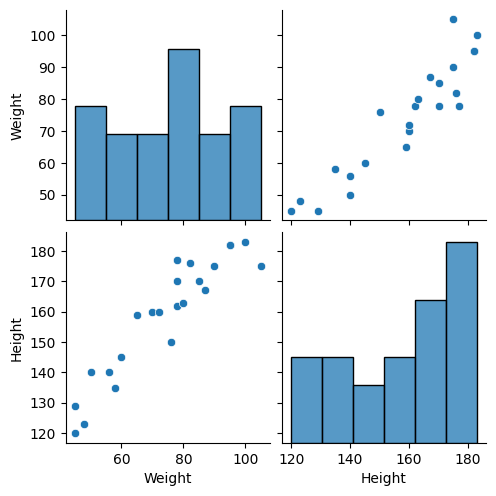

In [7]:
sns.pairplot(df)

In [8]:
X=df['Weight'] #this becomes as series , but whenever we need to work with independent feature we should keep it as dataframe or 2D Array
type(X)
np.array(X).shape

(23,)

In [9]:
X=df[['Weight']] # this will keep the independent feature column as 2d Array itself or a df.
type(X)
X
np.array(X).shape

(23, 1)

In [10]:
Y=df['Height'] ## here dependent / (O/P) feature can be of series form or 1D Array
Y
np.array(Y).shape

(23,)

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=41)

In [13]:
X_train.shape

(17, 1)

### Standardization 
#### Z score = (xi - mean)/std
#### where mean = 0 and std=1

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)   ##fit_transform means that the mean and std of this will be consider for next datapoints too 

In [16]:
X_test=scaler.transform(X_test) ## here we used tranform because we wnat to use old mean and std and dont want to give any clue about new data

## Apply Simple Linear Regression Algo

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regression  = LinearRegression(n_jobs=-1)

In [19]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [20]:
print("coefficient or slope : ",regression.coef_) ##slope or coefficient , 1 unit in the x axis there is 18 unit movement in y axis
print("intercept : ", regression.intercept_) ## the point where the best fit line is cross in y axis

coefficient or slope :  [18.53212247]
intercept :  153.52941176470588


#### plot of training data for best fit line

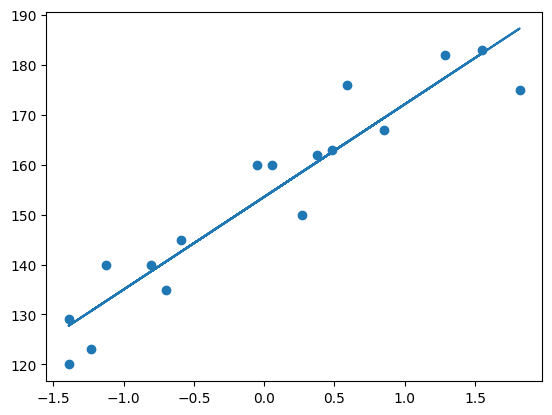

In [21]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

### prediction of test data
1. predicted height output = interncept_ + coef_ (Weight)
2. Y_pred_test = 153.529 + 18.83(X_test)

In [22]:
Y_pred = regression.predict(X_test)
Y_pred

array([177.31541446, 172.35999723, 167.40458   , 160.46699588,
       160.46699588, 147.58291109])

In [23]:
### performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

88.36991217864954
7.9005175758055515
9.400527228759541


### R square
#### Formula
**R^2 = 1 - SSR/SST**
#### R^2=coefficient of determination
#### SSR=sum of squares of residuals
#### SST=total sum of squares


In [25]:
from sklearn.metrics import r2_score

In [26]:
score = r2_score(Y_test,Y_pred)
print(score)

-0.7057999133680342


**Adjusted R2 = 1 - [(1-R2)*(n-1)/()n-k-1]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [27]:
### display adjusted R-Squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-1.1322498917100425

In [28]:
### OLS Linear Regression
!pip install statsmodels

In [29]:
import statsmodels.api as sm

In [30]:
model = sm.OLS(Y_train,X_train).fit()

In [31]:
prediction = model.predict(X_test)
print(prediction)

[23.78600269 18.83058546 13.87516824  6.93758412  6.93758412 -5.94650067]


In [32]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.2327
Date:                Sun, 11 Aug 2024   Prob (F-statistic):                       0.636
Time:                        14:56:35   Log-Likelihood:                         -109.71
No. Observations:                  17   AIC:                                      221.4
Df Residuals:                      16   BIC:                                      222.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/panda/Downloads/yes/envs/intern/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


### Prediction For New Data

In [33]:
regression.predict(scaler.transform([[70]]))

/home/panda/Downloads/yes/envs/intern/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([152.53832832])